Lets start with importing the libraries required for performing data cleaning and analysis.

In [2]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from warnings import filterwarnings

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', 1000)

To start with we will have to pull the data into python. To do that we willuse the python Pandas library.

In [3]:
# Importing dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Lets observe the data after importing and have a feel about the dataset.

In [4]:
# Observing the train dataset 
train.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
# Observing the test dataset
test.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,F,Divorced,A101,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,M,Umarried,A101,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,F,Divorced,A101,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,M,Umarried,A101,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,F,Divorced,A101,1,A122,32,A143,A152,1,A173,2,A192,A201


We can see that the 'serial_number' feature is not making much sense for data analysis so we will put it aside and proceed with other features

In [6]:
train_serial_number=train.pop('serial number')
test_serial_number=test.pop('serial number')

In [7]:
# Checking the number of rows and columns in the train dataframe
train.shape

(700, 24)

In [8]:
# Checking the number of rows and columns in the test dataframe
test.shape

(300, 23)

In [9]:
# Having a look at the basic information of the train dataframe using the info() command.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 24 columns):
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             700 non-null int64
telephone           

We can broad idea about the data like 
    1. There are 700 observations
    2. There are 2 features which are having null values.
    3. We can see the datatype of the features
    4. Size of the dataframe on memory
    5. count of features datatypewise

Now lets proceed with describing the data using the describe() command. This will give us an idea about the descriptive statistics in our dataset.

In [10]:
train.describe()

,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,700.000000,700.000000,580.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,20.652857,3182.331429,265.208621,1610.258571,39.365286,2.808571,35.322857,1.392857,1.148571
std,12.279683,2725.319217,569.396113,784.923838,6.784642,1.114573,11.319842,0.572328,0.355920
min,4.000000,276.000000,1.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1350.750000,34.000000,953.500000,33.742500,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2253.000000,70.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3913.250000,137.500000,2198.250000,44.765000,4.000000,41.000000,2.000000,1.000000
max,72.000000,15945.000000,3791.000000,3499.000000,53.610000,4.000000,75.000000,4.000000,2.000000


Lets see the descriptive statistics for features having object datatype.

In [11]:
train.describe(include='object')

,account_info,Loan,Regularity,Purpose,savings_account,employment_st,Gender,Status,gurantors,property_type,installment_type,housing_type,job_type,telephone,foreigner
count,427,700,700,700,700,700,700,700,700,700,700,700,700,700,700
unique,3,2,2,5,5,5,2,3,3,4,3,3,4,2,2
top,SILVER,YES,YES,A40,A61,A73,M,Umarried,A101,A123,A143,A152,A173,A191,A201
freq,197,642,434,575,427,244,484,386,633,238,570,503,445,422,674


There are chances that the features may be highly correlated with eachother so lets see the correlation matrix.

In [12]:
# Correlation Matrix
train.corr()

,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
duration_month,1.000000,0.634346,-0.044956,-0.050544,0.056986,0.026705,-0.047060,-0.014358,-0.015023
credit_amount,0.634346,1.000000,-0.051729,0.272107,0.042112,0.029258,0.023802,0.037022,0.012145
Saving Account,-0.044956,-0.051729,1.000000,-0.033621,0.033740,0.027248,0.072786,0.016798,-0.028740
Salary,-0.050544,0.272107,-0.033621,1.000000,0.012201,-0.044267,-0.088249,-0.019238,0.083307
investment,0.056986,0.042112,0.033740,0.012201,1.000000,0.050425,0.068886,0.052050,0.071413
resident_since,0.026705,0.029258,0.027248,-0.044267,0.050425,1.000000,0.273753,0.077693,0.071796
age,-0.047060,0.023802,0.072786,-0.088249,0.068886,0.273753,1.000000,0.132760,0.126560
credits_no,-0.014358,0.037022,0.016798,-0.019238,0.052050,0.077693,0.132760,1.000000,0.092303
liables,-0.015023,0.012145,-0.028740,0.083307,0.071413,0.071796,0.126560,0.092303,1.000000


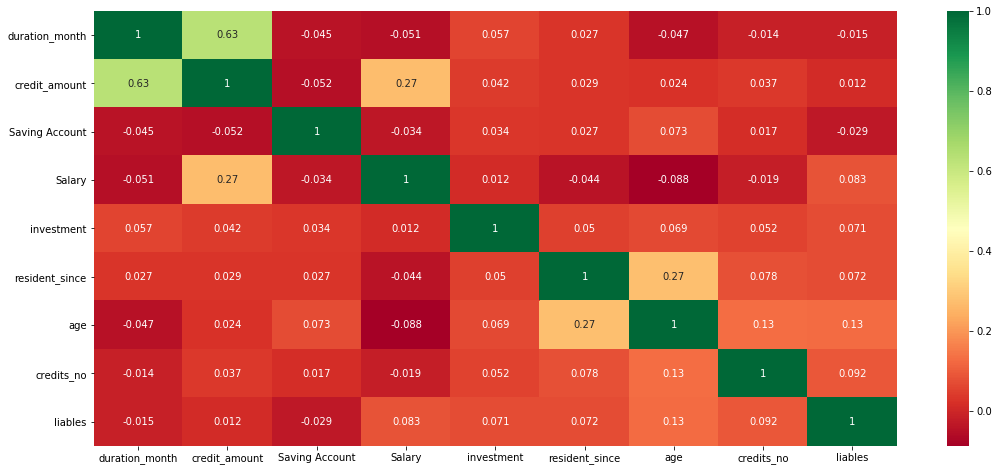

In [13]:
# Displaying correlation matrix using the HeatMap.
plt.figure(figsize=(18,8))
ax=sns.heatmap(train.corr(),annot=True,cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

We would also need to have a look at dependent features relation with other features.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


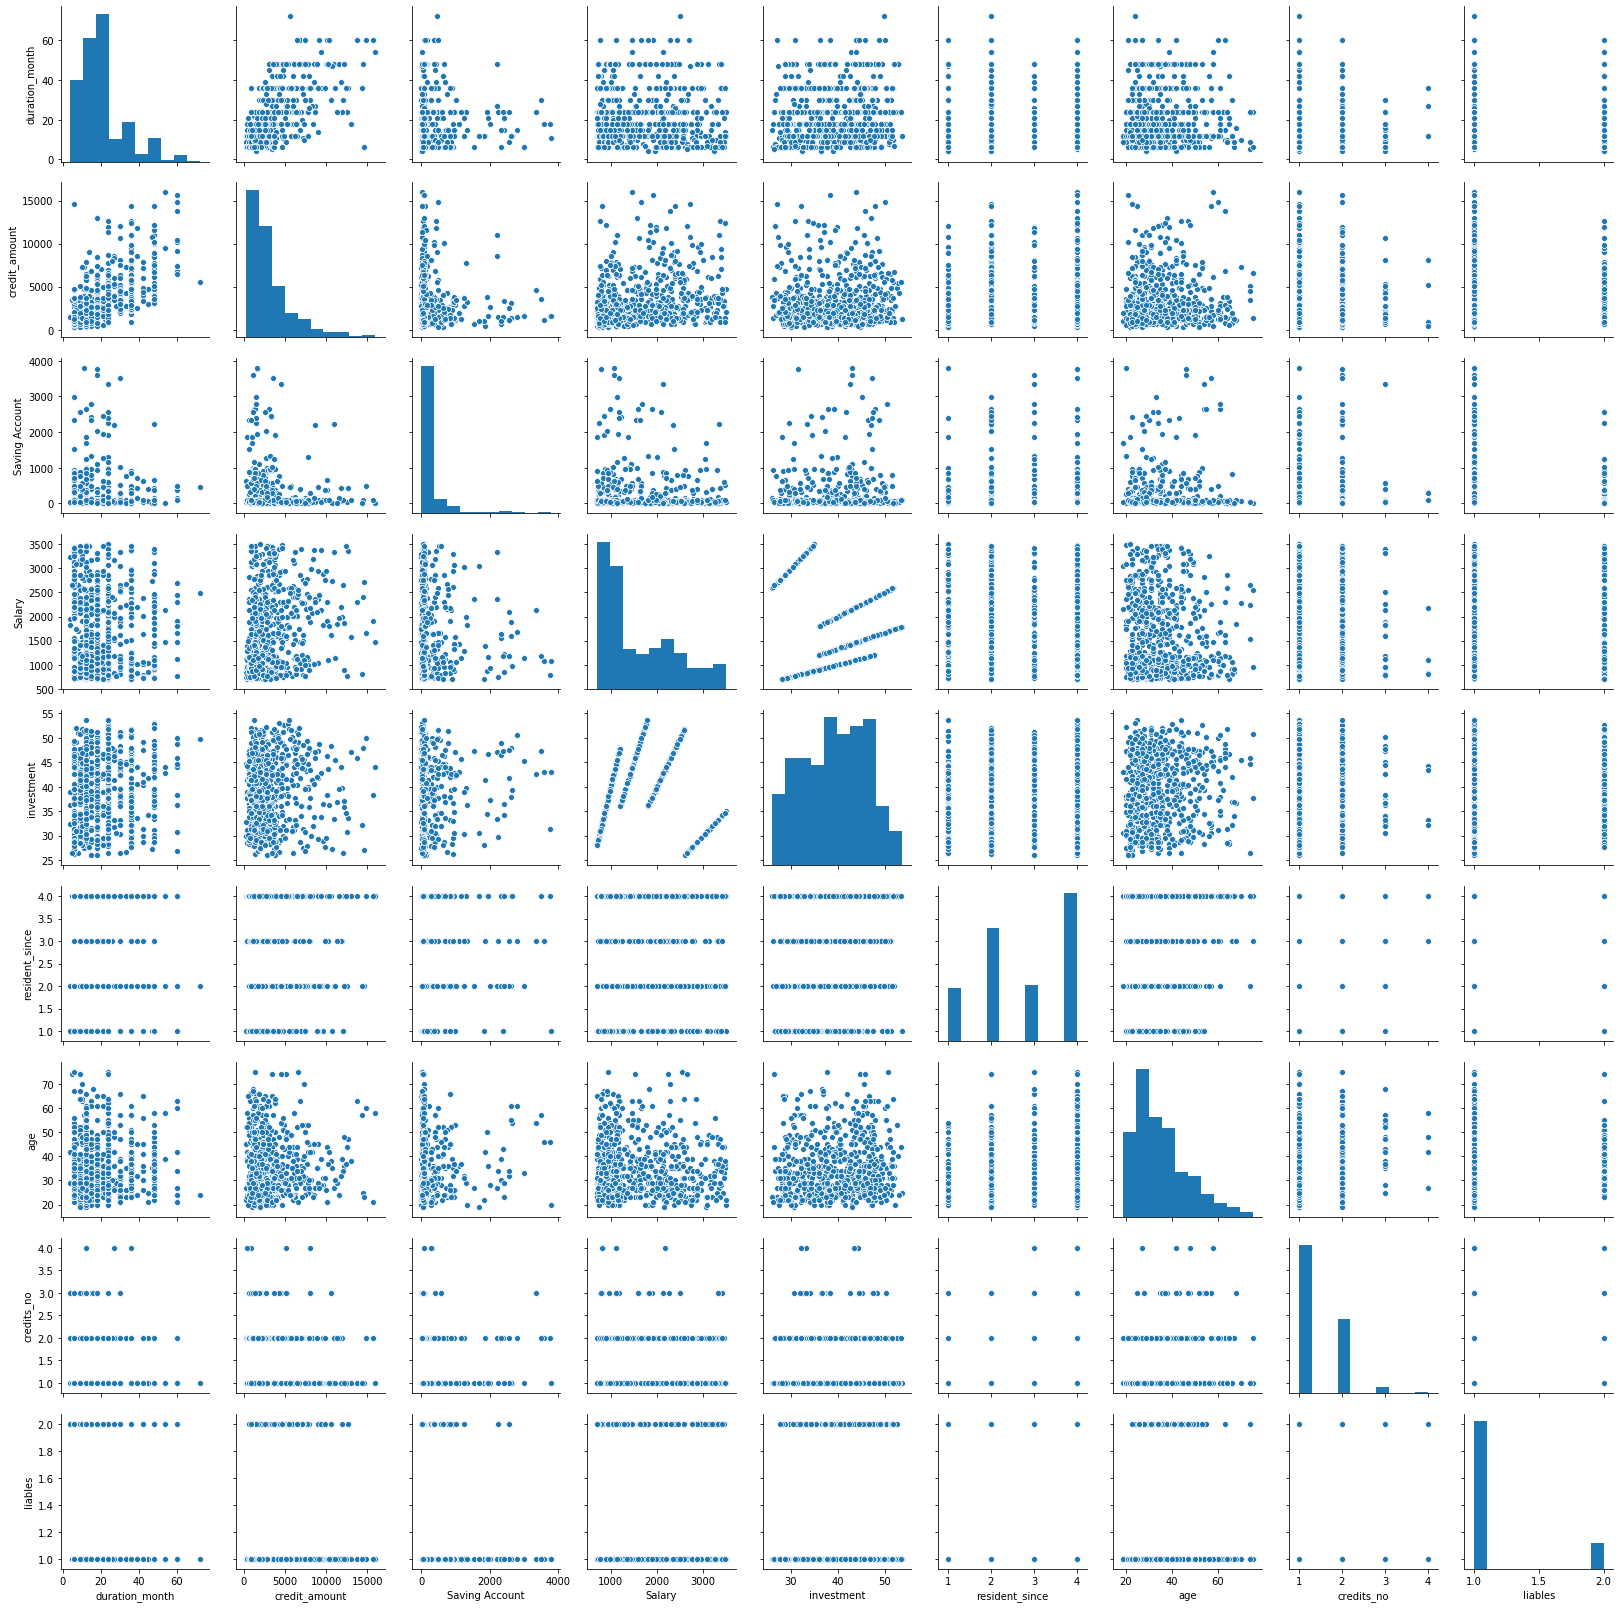

In [14]:
# Plotting pairplot
sns.pairplot(train)
plt.show()

In [15]:
# Checking the percentage of missing values in the dataframe
(train.isnull().sum()*100)/train.shape[0]

account_info        39.000000
duration_month       0.000000
Loan                 0.000000
Regularity           0.000000
Purpose              0.000000
credit_amount        0.000000
savings_account      0.000000
Saving Account      17.142857
employment_st        0.000000
Salary               0.000000
investment           0.000000
Gender               0.000000
Status               0.000000
gurantors            0.000000
resident_since       0.000000
property_type        0.000000
age                  0.000000
installment_type     0.000000
housing_type         0.000000
credits_no           0.000000
job_type             0.000000
liables              0.000000
telephone            0.000000
foreigner            0.000000
dtype: float64

In [16]:
# train['Saving Account'].fillna(-1,inplace=True)
# test['Saving Account'].fillna(-1,inplace=True)

In [17]:
# train['account_info'].fillna(train['account_info'].mode()[0],inplace=True)
# test['account_info'].fillna(test['account_info'].mode()[0],inplace=True)

Lets perform some visualizations to get a better idea about our data.

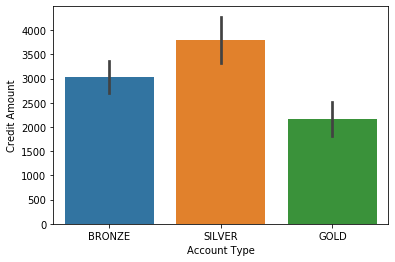

In [18]:
sns.barplot(x='account_info',y='credit_amount',data=train)
plt.ylabel('Credit Amount')
plt.xlabel('Account Type')
plt.show()

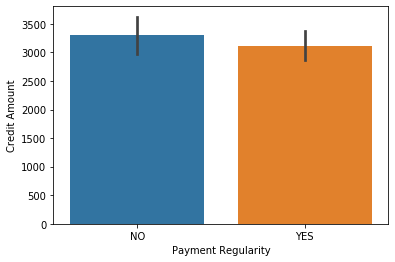

In [19]:
sns.barplot(x='Regularity',y='credit_amount',data=train)
plt.ylabel('Credit Amount')
plt.xlabel('Payment Regularity')
plt.show()

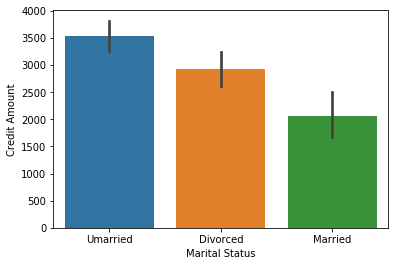

In [20]:
sns.barplot(x='Status',y='credit_amount',data=train)
plt.ylabel('Credit Amount')
plt.xlabel('Marital Status')
plt.show()

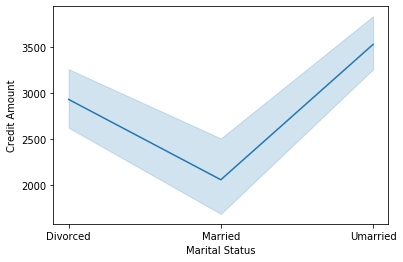

In [21]:
sns.lineplot(x="Status", y="credit_amount",data=train)
plt.ylabel('Credit Amount')
plt.xlabel('Marital Status')
plt.show()

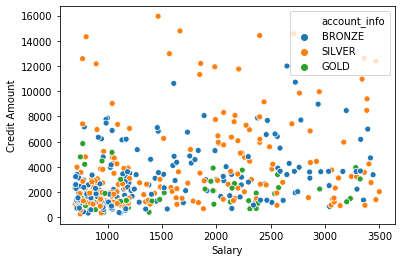

In [22]:
sns.scatterplot(x='Salary',y='credit_amount',data=train,hue='account_info')
plt.ylabel('Credit Amount')
plt.xlabel('Salary')
plt.show()

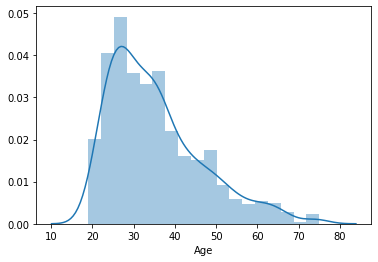

In [23]:
sns.distplot(train['age'],kde=True)
plt.xlabel('Age')
plt.show()


We can see that people having age between 25 and 40 are taking the credit services highest

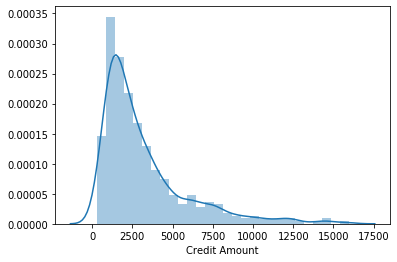

In [24]:
sns.distplot(train['credit_amount'],kde=True)
plt.xlabel('Credit Amount')
plt.show()

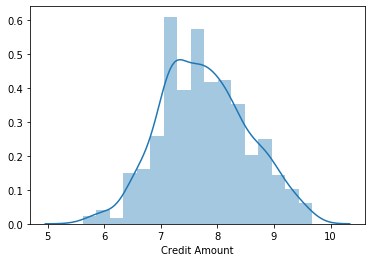

In [25]:
# train['credit_amount']=np.log(train['credit_amount'])
sns.distplot(np.log(train['credit_amount']),kde=True)
plt.xlabel('Credit Amount')
plt.show()

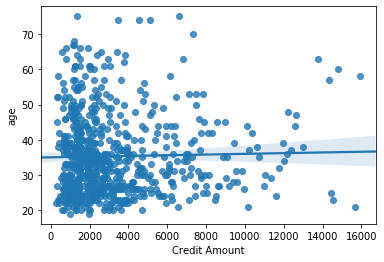

In [26]:
sns.regplot(y='age',x='credit_amount',data=train)
plt.xlabel('Credit Amount')
plt.show()

Lets store the features having datatype as object type into a separate variable and we will calculate the unique value counts for each of such features.

In [27]:
objectdtypes=list(train.select_dtypes(include='object').columns)

for i in objectdtypes:
    print('Value counts of {0} '.format(i))
    print(train[i].value_counts())
    print('================================')

Value counts of account_info 
SILVER    197
BRONZE    183
GOLD       47
Name: account_info, dtype: int64
Value counts of Loan 
YES    642
NO      58
Name: Loan, dtype: int64
Value counts of Regularity 
YES    434
NO     266
Name: Regularity, dtype: int64
Value counts of Purpose 
A40     575
A49      68
A46      40
A410     10
A48       7
Name: Purpose, dtype: int64
Value counts of savings_account 
A61    427
A65    120
A62     77
A63     42
A64     34
Name: savings_account, dtype: int64
Value counts of employment_st 
A73    244
A75    168
A74    126
A72    118
A71     44
Name: employment_st, dtype: int64
Value counts of Gender 
M    484
F    216
Name: Gender, dtype: int64
Value counts of Status 
Umarried    386
Divorced    250
Married      64
Name: Status, dtype: int64
Value counts of gurantors 
A101    633
A103     37
A102     30
Name: gurantors, dtype: int64
Value counts of property_type 
A123    238
A121    199
A122    154
A124    109
Name: property_type, dtype: int64
Value counts o

As you know there are some categorical features for which we need to create thedummy features. 
We will segregate those features and create dummy features for those features.

To segregate I have applied a condition where the categories more than 2 are added into a dummy_var list

In [28]:
dummy_vars=[]
for i in objectdtypes:
    if len(train[i].value_counts())>2:
        print('Value counts of {0} : '.format(i),len(train[i].value_counts()))
        print('================================')
        dummy_vars.append(i)

Value counts of account_info :  3
Value counts of Purpose :  5
Value counts of savings_account :  5
Value counts of employment_st :  5
Value counts of Status :  3
Value counts of gurantors :  3
Value counts of property_type :  4
Value counts of installment_type :  3
Value counts of housing_type :  3
Value counts of job_type :  4


A function is created to map the features having 2 categories.

In [29]:
# Defining the map function
def binary_map(x):
    return x.map({'YES': 1, "NO": 0,"M":1,"F":0,"A201":1,"A202":0,"A191":0,"A192":1})

In [30]:
# List of features which need to be mapped with 0 and 1 value.
# map_vars=['Regularity','Loan','Gender','telephone','foreigner']
map_vars=[]
for i in objectdtypes:
    if len(train[i].value_counts())<3:
        print('Value counts of {0} : '.format(i),len(train[i].value_counts()))
        print('----------------------------------------')
        map_vars.append(i)

Value counts of Loan :  2
----------------------------------------
Value counts of Regularity :  2
----------------------------------------
Value counts of Gender :  2
----------------------------------------
Value counts of telephone :  2
----------------------------------------
Value counts of foreigner :  2
----------------------------------------


In [31]:
# Mapping the features with 0 and 1
train[map_vars]=train[map_vars].apply(binary_map)
test[map_vars]=test[map_vars].apply(binary_map)

In [32]:
# Creating dummy features and appending it to the main dataframe.This operation will be carried out on both the test and train dataframe
dummy_df_train=pd.get_dummies(train[dummy_vars],drop_first=True,prefix='D')
train=pd.concat([train,dummy_df_train],axis=1)
dummy_df_test=pd.get_dummies(test[dummy_vars],drop_first=True,prefix='D')
test=pd.concat([test,dummy_df_test],axis=1)

In [33]:
# After concating the dummy features into the main dataframe i.e train we will drop the features which was used to create dummies.
# This operation will be carried out on both the test and train dataframe
train.drop(columns=dummy_vars,axis=1,inplace=True)
test.drop(columns=dummy_vars,axis=1,inplace=True)

Lets observe the dataframe after mapping the features with Zeroes and Ones and creating the dummy features for categorical features.

In [34]:
train.head()

,duration_month,Loan,Regularity,credit_amount,Saving Account,Salary,investment,Gender,resident_since,age,credits_no,liables,telephone,foreigner,D_GOLD,D_SILVER,D_A410,D_A46,D_A48,D_A49,D_A62,D_A63,D_A64,D_A65,D_A72,D_A73,D_A74,D_A75,D_Married,D_Umarried,D_A102,D_A103,D_A122,D_A123,D_A124,D_A142,D_A143,D_A152,D_A153,D_A172,D_A173,D_A174
0,6,1,0,1169,NaN,852,34.08,1,4,67,2,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,48,1,1,5951,72.0,2400,48.00,0,2,22,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,12,1,0,2096,68.0,2078,41.56,1,3,49,1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
3,42,1,1,7882,73.0,2380,47.60,1,4,45,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0
4,24,1,0,4870,52.0,1756,52.68,1,4,53,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0


### Feature Scaling

In [35]:
# Lets separate the dataframe into X_train,y_train and X_test, y_test. 
# As we are not having y_test data we will create X_train,y_train and X_test

y_train=train.pop('credit_amount')
X_train=train
X_test=test

To get the features under one particular scale we will need to perform the standardization on our data. Lets standardise the data using StandardScaler.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # Instantiating the StandardScaler i.e creating an object of StandardScaler.

In [37]:
# Performing scaling on X_train and X_test dataframe
standardization_vals=['duration_month','Saving Account','Salary','investment','resident_since','age','credits_no','liables']
X_train[standardization_vals]=scaler.fit_transform(X_train[standardization_vals])
X_test[standardization_vals]=scaler.fit_transform(X_test[standardization_vals])

### Modeling using XGBoost

Now that our data is ready for modelling we will be using the XGBoost Regressor algorithm for prediction.

We chose the XGBRegressor as its a alorithm which is much stable than the traditional linear regression model. 

Also the XGBRegressor will be also able to handle the nullvalues while modelling.

Therefore we will be proceeding with the XGBRegressor.

In [38]:
# Importing the Extreme Gradient Boost for XGboost Regression
import xgboost as xgb

In [39]:
# We will pass a list of paramters which can help us improve our score and also increase the speed for execution of our model.

xg_reg = xgb.XGBRegressor(alpha=10, 
                          sampling_method = "gradient_based",
                          base_score=0.5, 
                          booster="gblinear", 
                          colsample_bylevel=1,
                          colsample_bynode=1, 
                          colsample_bytree=0.3, 
                          gamma=0, 
                          gpu_id=1,
                          importance_type='gain', 
                          interaction_constraints=None,
                          learning_rate=0.1, 
                          max_delta_step=0, 
                          max_depth=6,
                          min_child_weight=1, 
                          monotone_constraints=None,
                          n_estimators=10, 
                          n_jobs=-1, 
                          num_parallel_tree=1,
                          objective='reg:squarederror', 
                          random_state=0, 
                          reg_alpha=10,
                          reg_lambda=2, 
                          scale_pos_weight=1, 
                          subsample=0.6, 
                          tree_method='auto',
                          validate_parameters=False,
                          verbosity=1,
                          seed = 42
                         )


In [40]:
# We hav prepared the model above with all the necessary parameters applied into it and let train the model 
# on the train data using the fit() function.
xg_reg.fit(X_train,y_train)

# Now lets predict using the learnt model on the text dataframe. We will be storing the predicted data into a
# separate variable i.e 'predictions'
predictions = xg_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [43]:
# We are done with the predictions and now lets export the predicted values into an excel file with the serial number
test_serial_number = list(test_serial_number)
result = pd.DataFrame({"S.no":test_serial_number, "credit_amount":predictions})
result.to_csv('XGB_Submission2.csv', index=False)